<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Data Gathering

In [118]:
df = pd.read_csv('car_dataset.csv')

In [13]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


# Data Preparation

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
df.shape

(301, 9)

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Vehicle_age,301.0,7.372093,2.891554,3.00,5.0,7.0,9.0,18.0
Fuel_Type_CNG,301.0,0.006645,0.081378,0.00,0.0,0.0,0.0,1.0
Fuel_Type_Diesel,301.0,0.199336,0.400166,0.00,0.0,0.0,0.0,1.0
Fuel_Type_Petrol,301.0,0.794020,0.405089,0.00,1.0,1.0,1.0,1.0
Seller_Type_Dealer,301.0,0.647841,0.478439,0.00,0.0,1.0,1.0,1.0
Transmission_Automatic,301.0,0.132890,0.340021,0.00,0.0,0.0,0.0,1.0


In [17]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

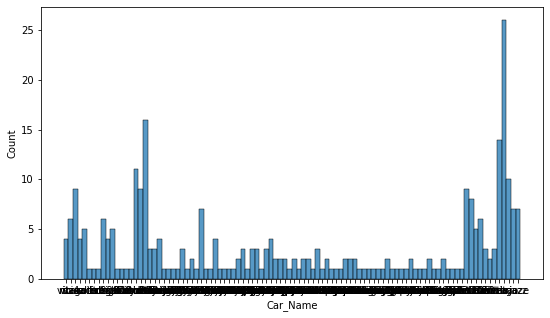

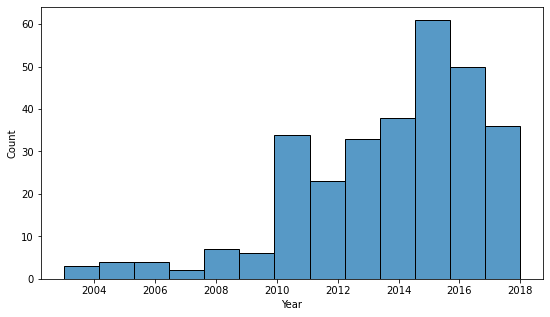

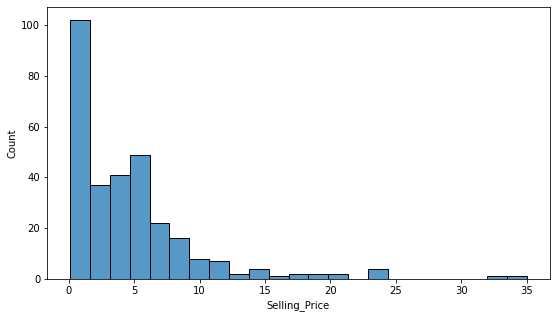

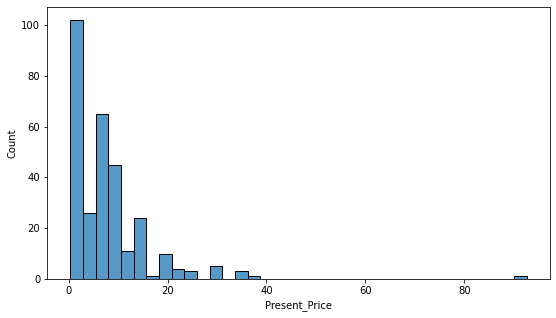

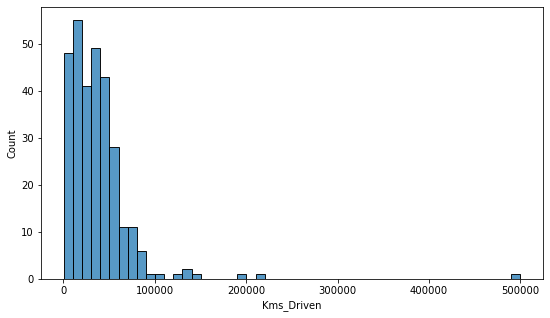

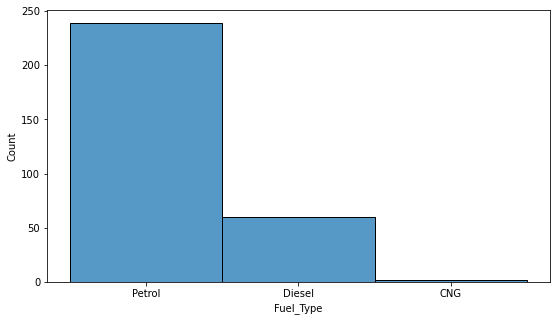

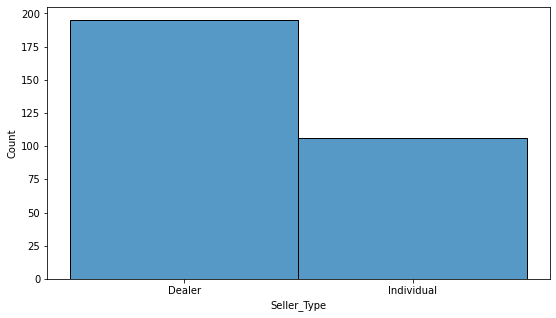

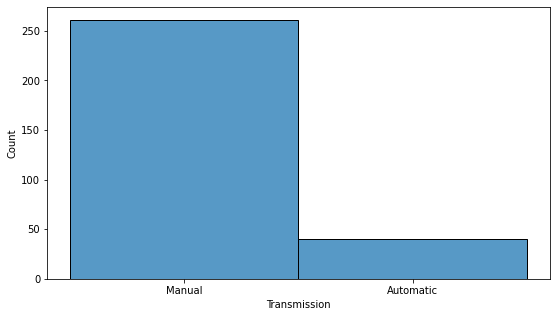

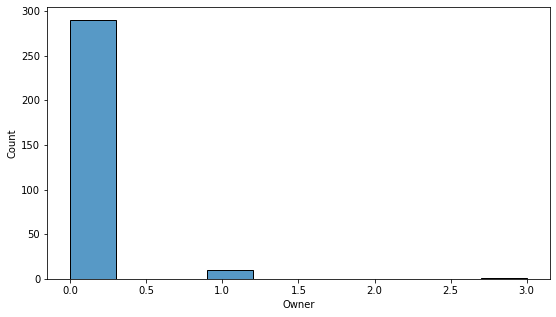

In [19]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

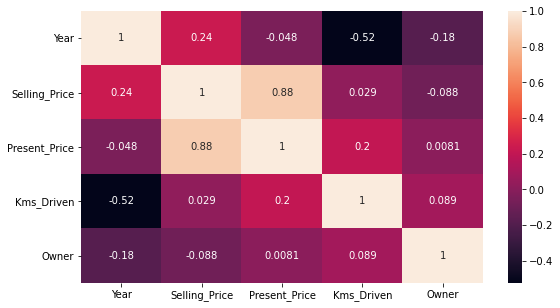

In [21]:
sns.heatmap(df.corr(), annot=True);

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [119]:
df["Vehicle_age"] = 2019 - df.Year

In [52]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


In [120]:
df[df.Kms_Driven>150000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_age
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0,14
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0,9
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0,11


In [121]:
# Better to drop km=500000 ( an outlier)
df = df[df.Kms_Driven < 150000]

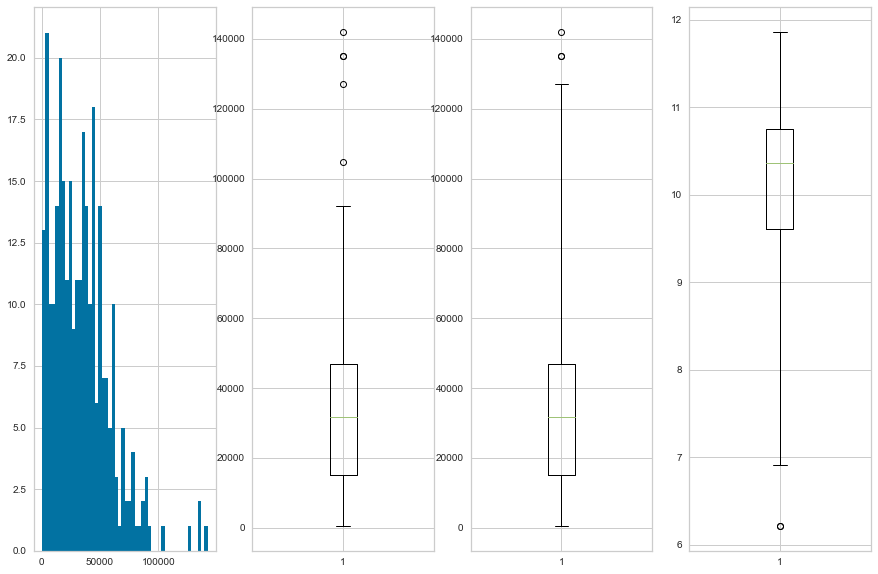

In [122]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.Kms_Driven, bins = 50)

plt.subplot(142)
plt.boxplot(df.Kms_Driven)

plt.subplot(143)
plt.boxplot(df.Kms_Driven, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.Kms_Driven), whis = 2.5)
plt.show()

In [123]:
df.Fuel_Type.value_counts()

Petrol    237
Diesel     59
CNG         2
Name: Fuel_Type, dtype: int64

In [124]:
df = df[df.Fuel_Type != "CNG"]

In [125]:
df.Fuel_Type.value_counts()

Petrol    237
Diesel     59
Name: Fuel_Type, dtype: int64

In [126]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [127]:
df.drop(columns=['Car_Name', "Year"], inplace=True)

In [128]:
df = pd.get_dummies(df, drop_first=True)

In [129]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_age,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,1,0,1
1,4.75,9.54,43000,0,6,0,0,1
2,7.25,9.85,6900,0,2,1,0,1
3,2.85,4.15,5200,0,8,1,0,1
4,4.60,6.87,42450,0,5,0,0,1


### Features and target variable

In [130]:
# I'll take transform KM to log of KM to normalize
df.Kms_Driven=np.log(df.Kms_Driven)

In [131]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_age,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,10.203592,0,5,1,0,1
1,4.75,9.54,10.668955,0,6,0,0,1
2,7.25,9.85,8.839277,0,2,1,0,1
3,2.85,4.15,8.556414,0,8,1,0,1
4,4.60,6.87,10.656082,0,5,0,0,1


In [132]:
df.shape

(296, 8)

In [133]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Vehicle_age', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'], dtype='object')

### Splitting data into training and testing

In [134]:
X = df.drop("Selling_Price", axis = 1)
y = df.Selling_Price

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (236, 7)
Train target shape   :  (236,)
Test features shape  :  (60, 7)
Test target shape    :  (60,)


##  Model Building (Linear Regression)

In [136]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize = True)
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [137]:
model.coef_

array([ 0.41367125, -0.06755139, -0.56289385, -0.42588515, -1.62541165,
       -1.30033561, -0.77968739])

In [138]:
model.intercept_

6.85994640123719

In [139]:
print("Model intercept  : ", model.intercept_, "\n")
for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])

Model intercept  :  6.85994640123719 

Present_Price :  0.41367125458740156
Kms_Driven :  -0.06755139106969253
Owner :  -0.5628938509359074
Vehicle_age :  -0.4258851495415267
Fuel_Type_Petrol :  -1.6254116464500206
Seller_Type_Individual :  -1.3003356096220589
Transmission_Manual :  -0.7796873930651146


In [210]:
lm_coeff_df=pd.DataFrame(model.coef_, X.columns, columns=["Linear"])
lm_coeff_df

,Linear
Present_Price,0.413671
Kms_Driven,-0.067551
Owner,-0.562894
Vehicle_age,-0.425885
Fuel_Type_Petrol,-1.625412
Seller_Type_Individual,-1.300336
Transmission_Manual,-0.779687


In [141]:
y_pred = model.predict(X_test)

In [142]:
residuals = y_test - y_pred

In [143]:
results_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residuals': residuals})
results_1.head()

,Actual,Predicted,Residuals
188,0.25,0.173116,0.076884
266,3.65,4.514323,-0.864323
87,5.90,6.418948,-0.518948
243,6.25,5.723016,0.526984
45,7.50,7.436150,0.063850


# Interpret the model

In [144]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [146]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print('MSE  = {:10}'.format(mse))
    print('RMSE = {:10}'.format(rmse))
    print("MAE  = {:10}".format(mae))
    print('R2   = {:9}'.format(R2_score))

In [147]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
MSE  = 4.959193673713734
RMSE = 2.2269247121790476
MAE  = 1.216618923813827
R2   = 0.8840038870644563


In [148]:
y_train_pred = model.predict(X_train)

In [149]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
MSE  = 2.752112974879712
RMSE = 1.6589493587447786
MAE  = 1.1646611885991474
R2   = 0.872245768852277


In [175]:
performance_metrics = {"lm_train": {"mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "lm_test": {"mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),           
    "mae" : mean_absolute_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
lm =pd.DataFrame(performance_metrics)
lm

,lm_train,lm_test
mse,2.752113,5.003703
rmse,1.658949,2.236896
mae,1.164661,1.222440
R2,0.872246,0.882963


# Model Evaluation

In [151]:
#Cross Validation of Linear Model
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [152]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.804965
test_neg_mean_absolute_error       -1.265421
test_neg_mean_squared_error        -3.800772
test_neg_root_mean_squared_error   -1.862775
dtype: float64

In [153]:
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004557,0.002747,0.850427,-1.295002,-4.522661,-2.126655
2,0.003256,0.002154,0.824164,-1.599820,-8.077133,-2.842030
3,0.002733,0.002127,0.835877,-1.076591,-1.890867,-1.375088
4,0.002612,0.001855,0.877602,-1.086236,-1.760268,-1.326751
5,0.002380,0.001837,0.913310,-1.020824,-1.538623,-1.240412
6,0.002340,0.001917,0.542788,-1.614149,-4.080502,-2.020025
7,0.002766,0.001951,0.685952,-1.607137,-6.332337,-2.516414
8,0.002362,0.002655,0.748422,-1.511204,-5.359592,-2.315079
9,0.002274,0.001942,0.908027,-0.735477,-1.040121,-1.019863
10,0.002259,0.001425,0.863081,-1.107769,-3.405619,-1.845432


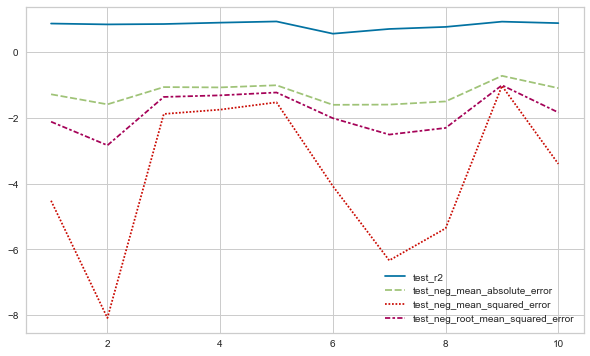

In [154]:
plt.figure (figsize=(10,6))
sns.lineplot(data = scores.iloc[:,2:]);

In [110]:
# Mean test R2 is smaller than our model. Model is not consistent!

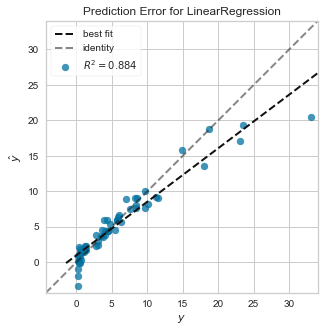

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [155]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lm= LinearRegression(normalize=True)
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [156]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

result_sample = results.head(25)
result_sample

,Actual,Predicted
188,0.25,0.173116
266,3.65,4.514323
87,5.90,6.418948
243,6.25,5.723016
45,7.50,7.436150
137,0.65,0.270839
284,3.50,3.719390
246,3.75,3.575682
68,4.35,5.962530
70,3.95,5.992673


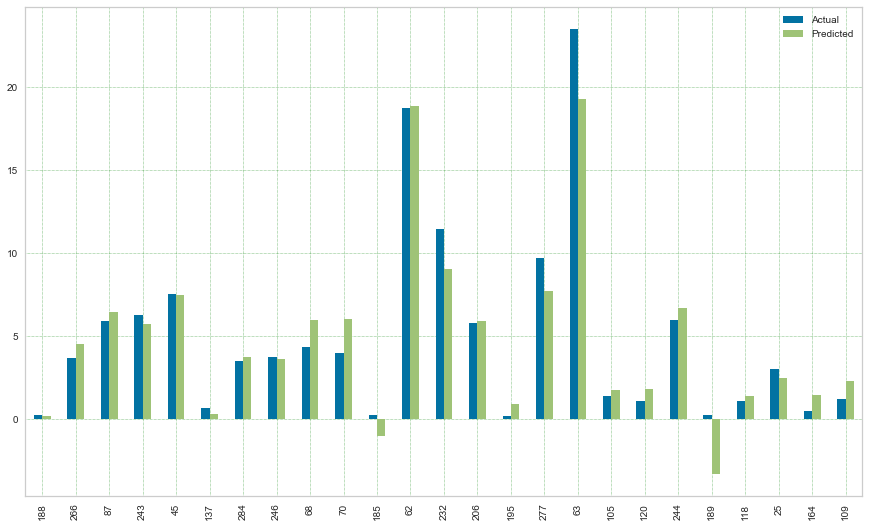

In [157]:
result_sample.plot(kind='bar',figsize=(15,9))
plt.grid(linestyle=':', linewidth='0.5', color='green')
plt.show()

# Regularization

# Ridge

In [158]:
from sklearn.linear_model import Ridge, RidgeCV

In [214]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [215]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
MSE  = 5.003702736102044
RMSE = 2.236895781233905
MAE  = 1.2224398833335424
R2   = 0.8829628149533154


In [216]:
y_train_pred = model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
MSE  = 2.752112974879712
RMSE = 1.6589493587447786
MAE  = 1.1646611885991474
R2   = 0.872245768852277


In [217]:
performance_metrics = {"rm_train": {"mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "rm_test": {"mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),           
    "mae" : mean_absolute_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rm =pd.DataFrame(performance_metrics)
rm

,rm_train,rm_test
mse,2.752113,5.003703
rmse,1.658949,2.236896
mae,1.164661,1.222440
R2,0.872246,0.882963


In [218]:
# Comparing Linear Model & Ridge Model Side by Side
pd.concat([lm, rm], axis = 1)

,lm_train,lm_test,rm_train,rm_test
mse,2.752113,5.003703,2.752113,5.003703
rmse,1.658949,2.236896,1.658949,2.236896
mae,1.164661,1.222440,1.164661,1.222440
R2,0.872246,0.882963,0.872246,0.882963


In [219]:
rm_coeff_df=pd.DataFrame(ridge_model.coef_, X.columns, columns=["Ridge"])
rm_coeff_df

,Ridge
Present_Price,0.415645
Kms_Driven,-0.057559
Owner,-0.536415
Vehicle_age,-0.429394
Fuel_Type_Petrol,-1.571599
Seller_Type_Individual,-1.270456
Transmission_Manual,-0.735660


In [220]:
# comparing coefficients:
pd.concat([lm_coeff_df, rm_coeff_df], axis=1)

,Linear,Ridge
Present_Price,0.413671,0.415645
Kms_Driven,-0.067551,-0.057559
Owner,-0.562894,-0.536415
Vehicle_age,-0.425885,-0.429394
Fuel_Type_Petrol,-1.625412,-1.571599
Seller_Type_Individual,-1.300336,-1.270456
Transmission_Manual,-0.779687,-0.735660


### Ridge Regression Cross Validation

In [201]:
ridge_model.alpha

1.0

In [221]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [222]:
ridge_cv = RidgeCV(alphas=alpha_space, cv=10, scoring='neg_root_mean_squared_error')
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [223]:
ridge_cv.alpha_

5.929292929292929

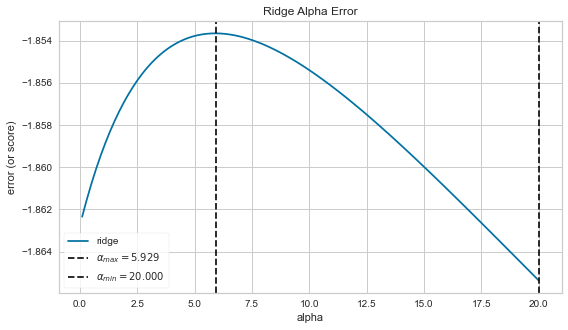

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [190]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10,
    scoring='neg_root_mean_squared_error'
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [224]:
# Running model with new alpha number
ridge_model = Ridge(alpha = ridge_cv.alpha_).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [225]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
MSE  = 5.18632643286846
RMSE = 2.2773507487579643
MAE  = 1.247381857780062
R2   = 0.8786912255884741


In [226]:
y_train_pred = model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
MSE  = 2.752112974879712
RMSE = 1.6589493587447786
MAE  = 1.1646611885991474
R2   = 0.872245768852277


In [232]:
performance_metrics = {"rm_cv_train": {"mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "rm_cv_test": {"mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),           
    "mae" : mean_absolute_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
rm_cv =pd.DataFrame(performance_metrics)
rm_cv

,rm_cv_train,rm_cv_test
mse,2.752113,5.186326
rmse,1.658949,2.277351
mae,1.164661,1.247382
R2,0.872246,0.878691


In [233]:
pd.concat([lm, rm, rm_cv], axis = 1)

,lm_train,lm_test,rm_train,rm_test,rm_cv_train,rm_cv_test
mse,2.752113,5.003703,2.752113,5.003703,2.752113,5.186326
rmse,1.658949,2.236896,1.658949,2.236896,1.658949,2.277351
mae,1.164661,1.222440,1.164661,1.222440,1.164661,1.247382
R2,0.872246,0.882963,0.872246,0.882963,0.872246,0.878691


In [229]:
rmcv_coeff_df=pd.DataFrame(ridge_model.coef_, X.columns, columns=["RidgeCV"])
rmcv_coeff_df

,RidgeCV
Present_Price,0.423673
Kms_Driven,-0.017121
Owner,-0.439555
Vehicle_age,-0.443219
Fuel_Type_Petrol,-1.353775
Seller_Type_Individual,-1.141335
Transmission_Manual,-0.571834


In [230]:
# comparing coefficients:
pd.concat([lm_coeff_df, rm_coeff_df, rmcv_coeff_df], axis=1)

,Linear,Ridge,RidgeCV
Present_Price,0.413671,0.415645,0.423673
Kms_Driven,-0.067551,-0.057559,-0.017121
Owner,-0.562894,-0.536415,-0.439555
Vehicle_age,-0.425885,-0.429394,-0.443219
Fuel_Type_Petrol,-1.625412,-1.571599,-1.353775
Seller_Type_Individual,-1.300336,-1.270456,-1.141335
Transmission_Manual,-0.779687,-0.735660,-0.571834


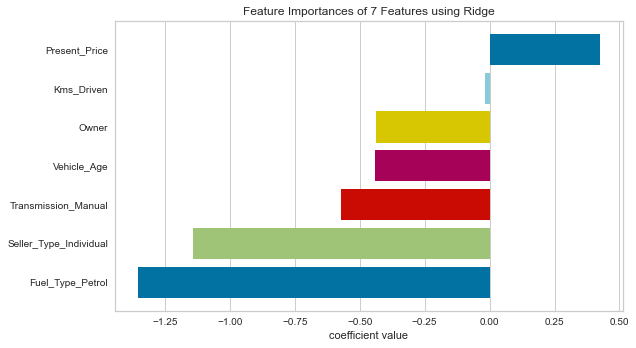

<AxesSubplot:title={'center':'Feature Importances of 7 Features using Ridge'}, xlabel='coefficient value'>

In [231]:
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

# Lasso

In [234]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [235]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

In [236]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
MSE  = 6.6548486976020795
RMSE = 2.5796993424820034
MAE  = 1.509796096789806
R2   = 0.8443423201663476


In [237]:
y_train_pred = model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
MSE  = 2.752112974879712
RMSE = 1.6589493587447786
MAE  = 1.1646611885991474
R2   = 0.872245768852277


In [239]:
performance_metrics = {"L1_train": {"mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "L1_test": {"mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),           
    "mae" : mean_absolute_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
L1 =pd.DataFrame(performance_metrics)
L1

,L1_train,L1_test
mse,2.752113,6.654849
rmse,1.658949,2.579699
mae,1.164661,1.509796
R2,0.872246,0.844342


In [240]:
pd.concat([lm, rm, rm_cv, L1], axis = 1)

,lm_train,lm_test,rm_train,rm_test,rm_cv_train,rm_cv_test,L1_train,L1_test
mse,2.752113,5.003703,2.752113,5.003703,2.752113,5.186326,2.752113,6.654849
rmse,1.658949,2.236896,1.658949,2.236896,1.658949,2.277351,1.658949,2.579699
mae,1.164661,1.222440,1.164661,1.222440,1.164661,1.247382,1.164661,1.509796
R2,0.872246,0.882963,0.872246,0.882963,0.872246,0.878691,0.872246,0.844342


In [241]:
L1_coeff_df=pd.DataFrame(lasso_model.coef_, X.columns, columns=["Lasso"])
L1_coeff_df

,Lasso
Present_Price,0.469169
Kms_Driven,0.000000
Owner,-0.000000
Vehicle_age,-0.372181
Fuel_Type_Petrol,-0.000000
Seller_Type_Individual,-0.000000
Transmission_Manual,-0.000000


In [242]:
pd.concat([lm_coeff_df, rm_coeff_df, rmcv_coeff_df, L1_coeff_df], axis=1) # Lasso deleted 5 coeeficients !

,Linear,Ridge,RidgeCV,Lasso
Present_Price,0.413671,0.415645,0.423673,0.469169
Kms_Driven,-0.067551,-0.057559,-0.017121,0.000000
Owner,-0.562894,-0.536415,-0.439555,-0.000000
Vehicle_age,-0.425885,-0.429394,-0.443219,-0.372181
Fuel_Type_Petrol,-1.625412,-1.571599,-1.353775,-0.000000
Seller_Type_Individual,-1.300336,-1.270456,-1.141335,-0.000000
Transmission_Manual,-0.779687,-0.735660,-0.571834,-0.000000


### Lasso Regression Cross Validation

In [244]:
lasso_model.alpha

1.0

In [263]:
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10)

In [264]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [265]:
lasso_cv_model.alpha_

0.1

In [266]:
y_pred=lasso_cv_model.predict(X_test)

In [267]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
MSE  = 5.757256781875316
RMSE = 2.399428428162698
MAE  = 1.3447902626967998
R2   = 0.8653370987688747


In [268]:
y_train_pred = model.predict(X_train)
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
MSE  = 2.752112974879712
RMSE = 1.6589493587447786
MAE  = 1.1646611885991474
R2   = 0.872245768852277


In [269]:
performance_metrics = {"L1CV_train": {"mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "L1CV_test": {"mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),           
    "mae" : mean_absolute_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
L1CV =pd.DataFrame(performance_metrics)
L1CV

,L1CV_train,L1CV_test
mse,2.752113,5.757257
rmse,1.658949,2.399428
mae,1.164661,1.344790
R2,0.872246,0.865337


In [270]:
pd.concat([lm, rm, rm_cv, L1, L1CV], axis = 1)

,lm_train,lm_test,rm_train,rm_test,rm_cv_train,rm_cv_test,L1_train,L1_test,L1CV_train,L1CV_test
mse,2.752113,5.003703,2.752113,5.003703,2.752113,5.186326,2.752113,6.654849,2.752113,5.757257
rmse,1.658949,2.236896,1.658949,2.236896,1.658949,2.277351,1.658949,2.579699,1.658949,2.399428
mae,1.164661,1.222440,1.164661,1.222440,1.164661,1.247382,1.164661,1.509796,1.164661,1.344790
R2,0.872246,0.882963,0.872246,0.882963,0.872246,0.878691,0.872246,0.844342,0.872246,0.865337


In [271]:
L1CV_coeff_df=pd.DataFrame(lasso_cv_model.coef_, X.columns, columns=["LassoCV"])
L1CV_coeff_df

,LassoCV
Present_Price,0.445851
Kms_Driven,0.000000
Owner,-0.000000
Vehicle_age,-0.457316
Fuel_Type_Petrol,-0.886961
Seller_Type_Individual,-0.806558
Transmission_Manual,-0.000000


In [272]:
pd.concat([lm_coeff_df, rm_coeff_df, rmcv_coeff_df, L1_coeff_df, L1CV_coeff_df], axis=1) 

,Linear,Ridge,RidgeCV,Lasso,LassoCV
Present_Price,0.413671,0.415645,0.423673,0.469169,0.445851
Kms_Driven,-0.067551,-0.057559,-0.017121,0.000000,0.000000
Owner,-0.562894,-0.536415,-0.439555,-0.000000,-0.000000
Vehicle_age,-0.425885,-0.429394,-0.443219,-0.372181,-0.457316
Fuel_Type_Petrol,-1.625412,-1.571599,-1.353775,-0.000000,-0.886961
Seller_Type_Individual,-1.300336,-1.270456,-1.141335,-0.000000,-0.806558
Transmission_Manual,-0.779687,-0.735660,-0.571834,-0.000000,-0.000000


In [260]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [261]:
def evaluate_model(Model, lambdas):
    training_errors = [] 
    testing_errors = [] 
    for l in lambdas:

        model = Model(alpha=l) 
        model.fit(X_train, y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

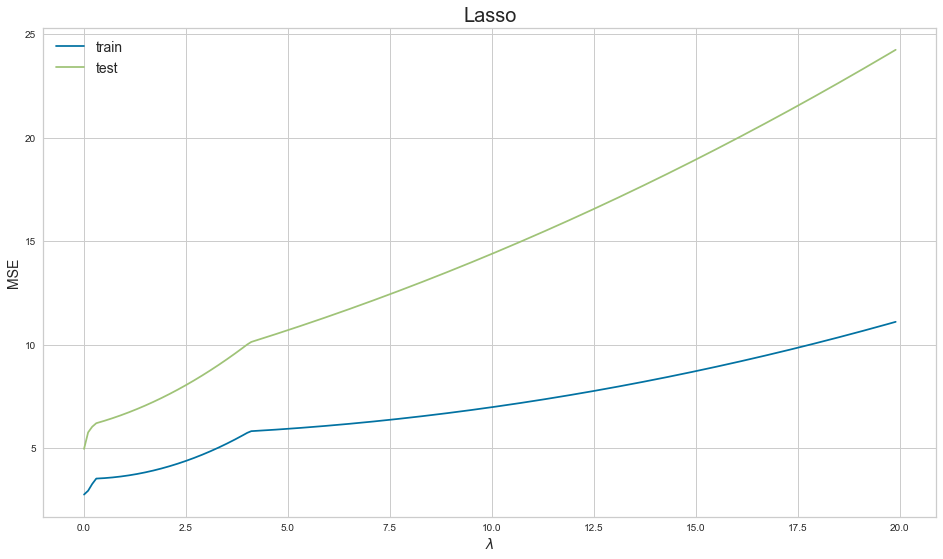

In [283]:
lambdas = np.arange(0, 20, step=0.1)
lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

## Elastic-Net 

In [274]:
elastic_model = ElasticNet()

In [275]:
elastic_model.fit(X_train, y_train)

ElasticNet()

In [276]:
y_pred = elastic_model.predict(X_test)

In [277]:
y_train_pred = elastic_model.predict(X_train)

In [278]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
MSE  = 6.4627182396429435
RMSE = 2.542187687729398
MAE  = 1.503849897298578
R2   = 0.8488362737737485


In [279]:
eval_metrics(y_train, y_train_pred)

Model testing performance:
--------------------------
MSE  = 3.5819911392990824
RMSE = 1.8926148946098575
MAE  = 1.2709104933761748
R2   = 0.8337224786351252


In [281]:
elastic_model.l1_ratio

0.5

In [282]:
elastic_model.alpha

1.0

In [284]:
performance_metrics = {"EN_train": {"mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "R2" : r2_score(y_train, y_train_pred)},
    "EN_test": {"mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred)),           
    "mae" : mean_absolute_error(y_test, y_pred),
    "R2" : r2_score(y_test, y_pred)}}
EN =pd.DataFrame(performance_metrics)
EN

,EN_train,EN_test
mse,3.581991,6.462718
rmse,1.892615,2.542188
mae,1.270910,1.503850
R2,0.833722,0.848836


In [285]:
pd.concat([lm, rm, rm_cv, L1, L1CV, EN], axis = 1)

,lm_train,lm_test,rm_train,rm_test,rm_cv_train,rm_cv_test,L1_train,L1_test,L1CV_train,L1CV_test,EN_train,EN_test
mse,2.752113,5.003703,2.752113,5.003703,2.752113,5.186326,2.752113,6.654849,2.752113,5.757257,3.581991,6.462718
rmse,1.658949,2.236896,1.658949,2.236896,1.658949,2.277351,1.658949,2.579699,1.658949,2.399428,1.892615,2.542188
mae,1.164661,1.222440,1.164661,1.222440,1.164661,1.247382,1.164661,1.509796,1.164661,1.344790,1.270910,1.503850
R2,0.872246,0.882963,0.872246,0.882963,0.872246,0.878691,0.872246,0.844342,0.872246,0.865337,0.833722,0.848836


In [288]:
EN_coeff_df=pd.DataFrame(elastic_model.coef_, X.columns, columns=["Elastic"])
EN_coeff_df

,Elastic
Present_Price,0.473938
Kms_Driven,0.000000
Owner,-0.000000
Vehicle_age,-0.407943
Fuel_Type_Petrol,-0.000000
Seller_Type_Individual,-0.000000
Transmission_Manual,-0.000000


In [289]:
pd.concat([lm_coeff_df, rm_coeff_df, rmcv_coeff_df, L1_coeff_df, L1CV_coeff_df, EN_coeff_df], axis=1) 

,Linear,Ridge,RidgeCV,Lasso,LassoCV,Elastic
Present_Price,0.413671,0.415645,0.423673,0.469169,0.445851,0.473938
Kms_Driven,-0.067551,-0.057559,-0.017121,0.000000,0.000000,0.000000
Owner,-0.562894,-0.536415,-0.439555,-0.000000,-0.000000,-0.000000
Vehicle_age,-0.425885,-0.429394,-0.443219,-0.372181,-0.457316,-0.407943
Fuel_Type_Petrol,-1.625412,-1.571599,-1.353775,-0.000000,-0.886961,-0.000000
Seller_Type_Individual,-1.300336,-1.270456,-1.141335,-0.000000,-0.806558,-0.000000
Transmission_Manual,-0.779687,-0.735660,-0.571834,-0.000000,-0.000000,-0.000000


# Polynomial Regression

In [290]:
from sklearn.preprocessing import PolynomialFeatures

In [348]:
df1 = pd.read_csv('car_dataset.csv')

In [349]:
df1["Vehicle_age"] = 2019 - df1.Year

In [350]:
df1 = df1[df1.Kms_Driven < 150000]

In [351]:
df1 = df1[df1.Fuel_Type != "CNG"]

In [352]:
df1.drop(columns=['Car_Name', "Year"], inplace=True)

In [353]:
df1.Kms_Driven=np.log(df1.Kms_Driven)

In [354]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_age
0,3.35,5.59,10.203592,Petrol,Dealer,Manual,0,5
1,4.75,9.54,10.668955,Diesel,Dealer,Manual,0,6
2,7.25,9.85,8.839277,Petrol,Dealer,Manual,0,2
3,2.85,4.15,8.556414,Petrol,Dealer,Manual,0,8
4,4.60,6.87,10.656082,Diesel,Dealer,Manual,0,5


In [385]:
df1.shape

(296, 8)

In [356]:
Trans = df1[["Kms_Driven", "Vehicle_age"]]

In [357]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [387]:
polynomial_converter.fit(df1[["Kms_Driven", "Vehicle_age"]])

PolynomialFeatures(include_bias=False)

In [388]:
poly_features = polynomial_converter.transform(df1[["Kms_Driven", "Vehicle_age"]])

In [389]:
df1.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Vehicle_age'], dtype='object')

In [390]:
df1 = pd.get_dummies(df1, drop_first=True)

In [391]:
df1.head(3)

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_age,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,10.203592,0,5,1,0,1
1,4.75,9.54,10.668955,0,6,0,0,1
2,7.25,9.85,8.839277,0,2,1,0,1


In [393]:
X = df1.drop("Selling_Price", axis=1)
y = df1.Selling_Price

In [394]:
df1.shape

(296, 8)

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [396]:
model_poly = LinearRegression()

In [397]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [398]:
y_pred = model_poly.predict(X_test)

In [399]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)

In [400]:
compare.head()

,Actual,pred,residual
194,0.20,-2.111928,2.311928
236,3.10,4.393015,-1.293015
190,0.20,-2.194124,2.394124
273,2.25,2.906354,-0.656354
137,0.65,0.143118,0.506882


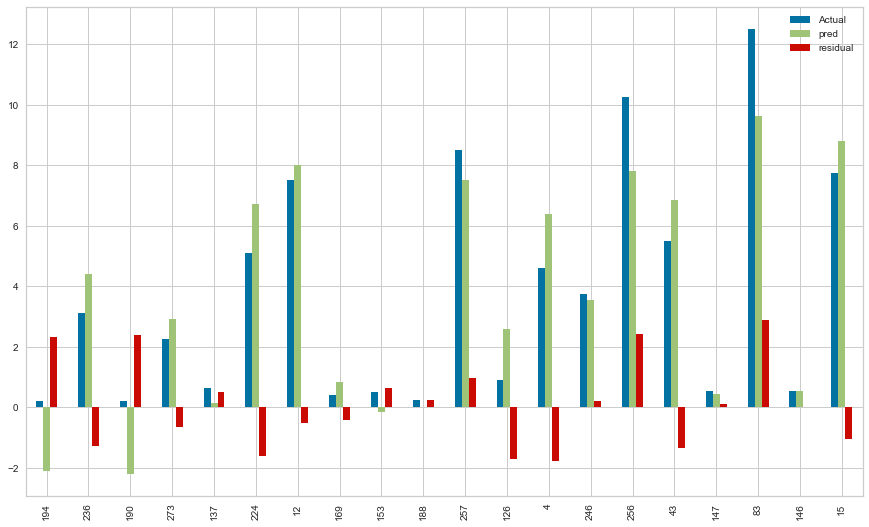

In [401]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

In [402]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
MSE  = 2.6365891990481165
RMSE = 1.6237577402581078
MAE  = 1.229800979351642
R2   = 0.8590468010575046
